# Event-wise Energy Deposition

Simulate the concrete overburden, two walls, floor, and LAr in the cryostat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cosmic Background

In [2]:
cosmicFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/cosmicEvt.csv'
cosmic = pd.read_csv( cosmicFile )

### Number of events with cosmic and cosmic-induced particles traversing the LArTPC

In [3]:
cosmic

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,9,0.412392,0.152080,0.081132,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,162.319672,0.0,0.0,0.0
1,0,217,0.252048,0.103262,0.042250,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,518.317061,0.0,0.0,0.0
2,0,390,0.499575,0.225383,0.154315,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.006465,0.003259,321.981197,0.0,0.0,0.0
3,0,528,8.917422,2.412665,5.179838,44.678063,44.678063,241.413558,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,348.899246,0.0,0.0,0.0
4,0,566,0.197642,0.117907,0.052935,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,291.317594,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,2399,476,0.082027,0.082027,0.028457,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.899152,0.0,0.0,0.0
18439,2399,558,2.258550,0.777496,1.011929,16.912431,16.912431,95.212260,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,47.326285,0.0,0.0,0.0
18440,2399,656,0.069528,0.067605,0.020369,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,85.161490,0.0,0.0,0.0
18441,2399,752,6.699401,2.929394,8.380428,61.565192,61.565192,334.907560,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,164.276965,0.0,0.0,0.0


18443 out of 2.4M cosmogenic events have energy deposition in the LArTPC.  0.77% \
That said, 0.77% of the neutrino events will have cosmogenic pile-up - negligible.

### Number of events with at least a muon

In [4]:
cosmic[cosmic.muMaxLength>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
3,0,528,8.917422,2.412665,5.179838,44.678063,44.678063,241.413558,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,348.899246,0.0,0.0,0.0
6,0,849,53.712464,19.405278,68.911493,133.199819,133.199819,724.484936,0.0,0.0,0.0,0.0,0.0,0.0,0.022444,0.003206,291.219473,0.0,0.0,0.0
9,1,149,17.930648,2.121717,5.283883,127.244932,127.244932,667.783314,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,130.247152,0.0,0.0,0.0
14,1,486,16.240526,1.985895,5.907150,113.533776,113.533776,643.965374,0.0,0.0,0.0,0.0,0.0,0.0,0.019238,0.003206,68.670561,0.0,0.0,0.0
15,1,574,64.844415,26.486610,132.888470,140.367739,140.367739,724.193972,0.0,0.0,0.0,0.0,0.0,0.0,0.048094,0.003206,474.737264,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18436,2399,46,5.173322,2.305568,6.256866,56.264422,56.264422,316.726789,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
18437,2399,60,5.067385,1.325927,2.000078,46.884457,46.884457,264.432534,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
18439,2399,558,2.258550,0.777496,1.011929,16.912431,16.912431,95.212260,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,47.326285,0.0,0.0,0.0
18441,2399,752,6.699401,2.929394,8.380428,61.565192,61.565192,334.907560,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,164.276965,0.0,0.0,0.0


10620 events have at least a muon track out of 2.4M events simulated.  That means 0.44%.

### Number of events with a muon and the muon is shorter than 5cm in the TPC

In [6]:
cosmic[(cosmic.muMaxLength<50)&(cosmic.muMaxLength>0)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
38,4,764,0.594483,0.320873,0.269678,6.997968,6.997968,39.130582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
94,10,137,1.045322,0.480882,0.508222,30.345262,30.345262,48.713011,5.400694,5.400694,0.470125,0.083275,0.052317,297.779541,0.004108,0.003206,170.253953,0.0,0.0,0.0
201,24,448,0.879227,0.625869,0.688648,29.586542,29.586542,46.884674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010194,0.003206,254.267938,0.0,0.0,0.0
213,26,543,1.391235,0.505736,0.652354,29.263355,29.263355,45.747176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006413,0.003206,230.021366,0.0,0.0,0.0
564,71,689,0.728893,0.609260,0.672481,9.268955,9.268955,47.819984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003206,0.003206,143.075146,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,2190,731,1.439677,1.344501,2.534333,3.411547,3.411547,19.767125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003206,0.003206,83.002265,0.0,0.0,0.0
16969,2213,460,3.859508,2.778727,9.443957,4.381491,4.381491,22.803362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
17111,2230,486,1.004097,0.625869,0.603656,9.790917,9.790917,6.785796,0.000000,0.000000,0.000000,0.066989,0.033580,407.177806,0.013239,0.003294,85.329463,0.0,0.0,0.0
17479,2276,813,2.692076,0.941831,1.439976,8.888924,8.888924,6.052998,0.000000,0.000000,0.000000,0.232831,0.163067,662.201840,0.016781,0.003206,294.897464,0.0,0.0,0.0


We should be able to identify a muon and reject the event if the muon track is longer than 5cm. \
0.0038% of cosmic events have a muon track shorter than 5cm in the LArTPC.

### Number of events with either no muon or muons shorter than 5cm

In [7]:
cosmic[(cosmic.muMaxLength<50)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,9,0.412392,0.152080,0.081132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,162.319672,0.0,0.0,0.0
1,0,217,0.252048,0.103262,0.042250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,518.317061,0.0,0.0,0.0
2,0,390,0.499575,0.225383,0.154315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006465,0.003259,321.981197,0.0,0.0,0.0
4,0,566,0.197642,0.117907,0.052935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,291.317594,0.0,0.0,0.0
5,0,756,0.119039,0.087210,0.031625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,83.627256,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,2398,456,0.862727,0.862727,1.451138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,463.988277,0.0,0.0,0.0
18433,2398,582,4.863915,3.399640,9.240139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,937.777291,0.0,0.0,0.0
18434,2398,819,0.163436,0.068890,0.021045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,352.209182,0.0,0.0,0.0
18438,2399,476,0.082027,0.082027,0.028457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.899152,0.0,0.0,0.0


7915 out of 2.4M cosmogenic events have either no muons or muons shorter than 5cm.  0.33%

### Muon length in the LArTPC

In [8]:
cosmic.muMaxLength.max()

962.2605038220432

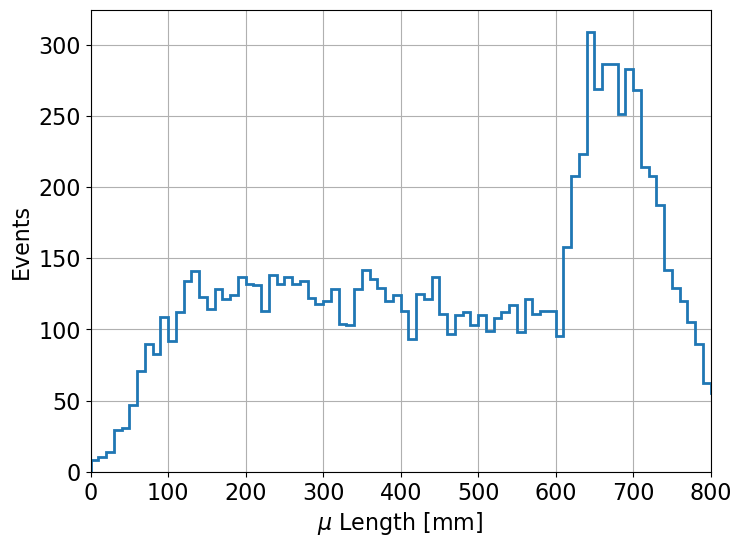

In [9]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[(cosmic.muMaxLength>0)].muMaxLength, bins = np.linspace(0, 810, 82), histtype = 'step', lw = 2)
ax.set_xlabel( r'$\mu$ Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 800])

ax.grid(":")
fig.savefig('CosmicMuonLength.pdf')

### Electron energy deposition in LArTPC

#### All electrons

In [10]:
cosmic[cosmic.eTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,9,0.412392,0.152080,0.081132,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,162.319672,0.0,0.0,0.0
1,0,217,0.252048,0.103262,0.042250,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,518.317061,0.0,0.0,0.0
2,0,390,0.499575,0.225383,0.154315,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.006465,0.003259,321.981197,0.0,0.0,0.0
3,0,528,8.917422,2.412665,5.179838,44.678063,44.678063,241.413558,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,348.899246,0.0,0.0,0.0
4,0,566,0.197642,0.117907,0.052935,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,291.317594,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,2399,476,0.082027,0.082027,0.028457,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.899152,0.0,0.0,0.0
18439,2399,558,2.258550,0.777496,1.011929,16.912431,16.912431,95.212260,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,47.326285,0.0,0.0,0.0
18440,2399,656,0.069528,0.067605,0.020369,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,85.161490,0.0,0.0,0.0
18441,2399,752,6.699401,2.929394,8.380428,61.565192,61.565192,334.907560,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,164.276965,0.0,0.0,0.0


In [11]:
cosmic.eMaxE.max()

135.61334239521656

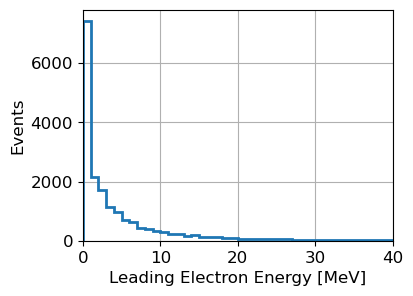

In [12]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
# fig.savefig('CosmicAlleMaxE.pdf')

In [13]:
cosmic[cosmic.eMaxE>40.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
101,11,15,109.748600,44.008279,230.358590,139.544827,139.544827,715.018917,0.0,0.0,0.0,0.0,0.0,0.0,0.061246,0.003206,486.191244,0.0,0.0,0.0
115,12,792,126.735449,56.239718,256.353688,132.586774,132.586774,714.094826,0.0,0.0,0.0,0.0,0.0,0.0,0.103908,0.003206,753.328272,0.0,0.0,0.0
260,34,797,80.392824,42.190580,216.020462,145.673031,145.673031,756.743686,0.0,0.0,0.0,0.0,0.0,0.0,0.045463,0.003206,485.854546,0.0,0.0,0.0
409,55,93,225.772464,89.357467,442.066997,121.432587,121.432587,653.244290,0.0,0.0,0.0,0.0,0.0,0.0,0.186678,0.003266,536.583442,0.0,0.0,0.0
519,66,320,124.557402,59.721275,294.636246,128.491588,128.491588,682.215407,0.0,0.0,0.0,0.0,0.0,0.0,0.090381,0.003206,968.150273,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18080,2352,617,121.953600,57.557820,280.472987,131.456398,131.456398,686.362535,0.0,0.0,0.0,0.0,0.0,0.0,0.087223,0.003206,705.456334,0.0,0.0,0.0
18145,2360,370,126.299232,53.426299,264.488486,156.989507,156.989507,839.117155,0.0,0.0,0.0,0.0,0.0,0.0,0.103937,0.003206,870.962303,0.0,0.0,0.0
18194,2367,156,280.370332,40.246631,186.035920,116.553818,116.553818,595.416920,0.0,0.0,0.0,0.0,0.0,0.0,0.180546,0.003298,748.430332,0.0,0.0,0.0
18348,2387,45,97.893990,41.847414,217.089606,125.657948,125.657948,667.239996,0.0,0.0,0.0,0.0,0.0,0.0,0.054536,0.003206,399.328592,0.0,0.0,0.0


In [14]:
cosmic[(cosmic.eMaxE>40.)&(cosmic.muMaxLength<50.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
3559,458,485,172.548553,56.074496,255.709054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159423,0.003206,987.840486,0.0,0.0,0.0
4655,609,466,61.015089,41.913616,206.039148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035596,0.003206,709.536486,0.0,0.0,0.0
11267,1468,855,559.529086,75.411535,363.493639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488998,0.003206,619.653486,0.0,0.0,0.0


195 cosmic events (out of 2.4M) have an electron > 40 MeV, while 3 cosmic events (out of 2.4M) have an electron > 40 MeV but no muons > 5cm

In [15]:
cosmic.eTotalE.max()

5555.522786120453

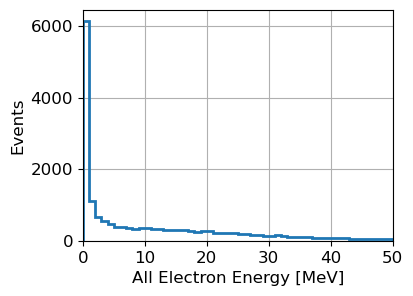

In [16]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eTotalE, bins = np.linspace(0, 50, 51), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 50])

ax.grid(":")
# fig.savefig('CosmicAlleTotalE.pdf')

In [17]:
cosmic[cosmic.eTotalE>50]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
6,0,849,53.712464,19.405278,68.911493,133.199819,133.199819,724.484936,0.0,0.0,0.0,0.0,0.0,0.0,0.022444,0.003206,291.219473,0.0,0.0,0.0
15,1,574,64.844415,26.486610,132.888470,140.367739,140.367739,724.193972,0.0,0.0,0.0,0.0,0.0,0.0,0.048094,0.003206,474.737264,0.0,0.0,0.0
28,3,364,60.893733,18.844246,77.348572,118.827146,118.827146,659.048255,0.0,0.0,0.0,0.0,0.0,0.0,0.035952,0.003206,478.712387,0.0,0.0,0.0
49,5,747,58.157842,12.302887,48.776244,133.874897,133.874897,700.149654,0.0,0.0,0.0,0.0,0.0,0.0,0.039129,0.003206,482.312767,0.0,0.0,0.0
53,6,106,68.749761,12.617286,57.621455,28.877508,28.877508,154.293662,0.0,0.0,0.0,0.0,0.0,0.0,0.080810,0.003206,601.010520,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,2392,33,58.094114,13.508042,47.099184,120.697660,120.697660,659.100291,0.0,0.0,0.0,0.0,0.0,0.0,0.051954,0.003206,639.010407,0.0,0.0,0.0
18398,2393,335,60.579356,31.271874,124.209675,93.664105,93.664105,516.831946,0.0,0.0,0.0,0.0,0.0,0.0,0.061823,0.003206,916.043756,0.0,0.0,0.0
18410,2395,960,168.559075,62.873822,264.551185,134.717144,134.717144,710.395288,0.0,0.0,0.0,0.0,0.0,0.0,0.119654,0.003218,589.364569,0.0,0.0,0.0
18411,2396,15,56.185947,19.075411,87.606393,141.920211,141.920211,791.305056,0.0,0.0,0.0,0.0,0.0,0.0,0.048094,0.003206,760.701756,0.0,0.0,0.0


### Events with a muon track > 5cm

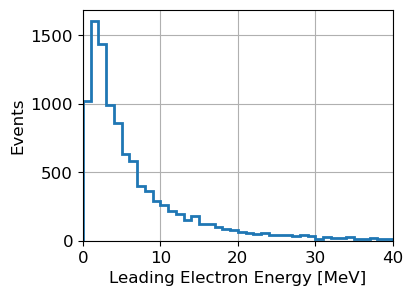

In [18]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
# fig.savefig('CosmicMuonAndeMaxE.pdf')

In [19]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eMaxE>40)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
101,11,15,109.748600,44.008279,230.358590,139.544827,139.544827,715.018917,0.0,0.0,0.0,0.0,0.0,0.0,0.061246,0.003206,486.191244,0.0,0.0,0.0
115,12,792,126.735449,56.239718,256.353688,132.586774,132.586774,714.094826,0.0,0.0,0.0,0.0,0.0,0.0,0.103908,0.003206,753.328272,0.0,0.0,0.0
260,34,797,80.392824,42.190580,216.020462,145.673031,145.673031,756.743686,0.0,0.0,0.0,0.0,0.0,0.0,0.045463,0.003206,485.854546,0.0,0.0,0.0
409,55,93,225.772464,89.357467,442.066997,121.432587,121.432587,653.244290,0.0,0.0,0.0,0.0,0.0,0.0,0.186678,0.003266,536.583442,0.0,0.0,0.0
519,66,320,124.557402,59.721275,294.636246,128.491588,128.491588,682.215407,0.0,0.0,0.0,0.0,0.0,0.0,0.090381,0.003206,968.150273,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18080,2352,617,121.953600,57.557820,280.472987,131.456398,131.456398,686.362535,0.0,0.0,0.0,0.0,0.0,0.0,0.087223,0.003206,705.456334,0.0,0.0,0.0
18145,2360,370,126.299232,53.426299,264.488486,156.989507,156.989507,839.117155,0.0,0.0,0.0,0.0,0.0,0.0,0.103937,0.003206,870.962303,0.0,0.0,0.0
18194,2367,156,280.370332,40.246631,186.035920,116.553818,116.553818,595.416920,0.0,0.0,0.0,0.0,0.0,0.0,0.180546,0.003298,748.430332,0.0,0.0,0.0
18348,2387,45,97.893990,41.847414,217.089606,125.657948,125.657948,667.239996,0.0,0.0,0.0,0.0,0.0,0.0,0.054536,0.003206,399.328592,0.0,0.0,0.0


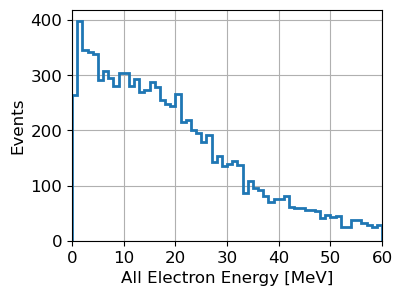

In [20]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eTotalE, bins = np.linspace(0, 60, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 60])

ax.grid(":")
# fig.savefig('CosmicMuonAndeTotalE.pdf')

In [21]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eTotalE>60.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
15,1,574,64.844415,26.486610,132.888470,140.367739,140.367739,724.193972,0.0,0.0,0.0,0.0,0.0,0.0,0.048094,0.003206,474.737264,0.0,0.0,0.0
28,3,364,60.893733,18.844246,77.348572,118.827146,118.827146,659.048255,0.0,0.0,0.0,0.0,0.0,0.0,0.035952,0.003206,478.712387,0.0,0.0,0.0
53,6,106,68.749761,12.617286,57.621455,28.877508,28.877508,154.293662,0.0,0.0,0.0,0.0,0.0,0.0,0.080810,0.003206,601.010520,0.0,0.0,0.0
92,10,6,83.080679,14.046709,57.651533,123.690216,123.690216,664.112799,0.0,0.0,0.0,0.0,0.0,0.0,0.036853,0.003206,603.285619,0.0,0.0,0.0
101,11,15,109.748600,44.008279,230.358590,139.544827,139.544827,715.018917,0.0,0.0,0.0,0.0,0.0,0.0,0.061246,0.003206,486.191244,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18344,2386,671,133.896411,22.385136,85.053460,128.223162,128.223162,692.378329,0.0,0.0,0.0,0.0,0.0,0.0,0.083690,0.003206,658.897740,0.0,0.0,0.0
18348,2387,45,97.893990,41.847414,217.089606,125.657948,125.657948,667.239996,0.0,0.0,0.0,0.0,0.0,0.0,0.054536,0.003206,399.328592,0.0,0.0,0.0
18352,2387,571,82.818244,13.284466,48.721964,47.737152,47.737152,266.837875,0.0,0.0,0.0,0.0,0.0,0.0,0.074071,0.003206,520.904207,0.0,0.0,0.0
18398,2393,335,60.579356,31.271874,124.209675,93.664105,93.664105,516.831946,0.0,0.0,0.0,0.0,0.0,0.0,0.061823,0.003206,916.043756,0.0,0.0,0.0


### Events without a muon track > 5cm

In [22]:
cosmic[cosmic.muMaxLength<50.].eMaxE.max()

75.4115346290557

In [23]:
cosmic[cosmic.muMaxLength<50.].eTotalE.max()

559.5290856043337

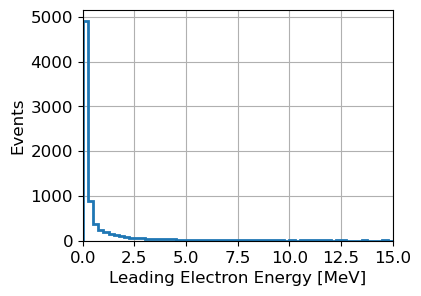

In [24]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eMaxE, bins = np.linspace(0, 15, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 15])

ax.grid(":")
# fig.savefig('CosmicNoMuonAndeMaxE.pdf')

In [25]:
len(cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>15.)])

89

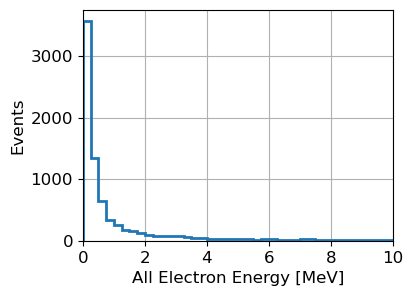

In [26]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eTotalE, bins = np.linspace(0, 10, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 10])

ax.grid(":")
# fig.savefig('CosmicNoMuonAndeTotalE.pdf')

In [27]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eTotalE>10.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
17,1,665,30.346126,15.127727,66.096815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038505,0.003206,398.222506,0.0,0.0,0.0
33,3,995,10.108160,7.414240,28.400794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,585.501439,0.0,0.0,0.0
59,6,766,13.726296,10.523349,40.528690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016609,0.003206,461.304395,0.0,0.0,0.0
67,7,436,19.013618,6.399307,22.891443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,283.034252,0.0,0.0,0.0
93,10,104,25.152084,17.055276,74.261996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025977,0.003206,868.590624,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18364,2388,955,12.970909,10.891480,36.053493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,600.004362,0.0,0.0,0.0
18365,2389,172,11.039735,4.929426,12.795656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019936,0.003206,871.795519,0.0,0.0,0.0
18377,2391,217,11.659329,9.049759,29.041063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,447.655904,0.0,0.0,0.0
18382,2391,809,12.119734,5.446144,21.136285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012825,0.003206,514.446647,0.0,0.0,0.0


In [28]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>5.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
17,1,665,30.346126,15.127727,66.096815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038505,0.003206,398.222506,0.0,0.0,0.0
33,3,995,10.108160,7.414240,28.400794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,585.501439,0.0,0.0,0.0
59,6,766,13.726296,10.523349,40.528690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016609,0.003206,461.304395,0.0,0.0,0.0
67,7,436,19.013618,6.399307,22.891443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,283.034252,0.0,0.0,0.0
93,10,104,25.152084,17.055276,74.261996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025977,0.003206,868.590624,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18366,2389,329,6.826723,6.371506,24.561790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006739,0.003206,197.035833,0.0,0.0,0.0
18373,2390,754,8.502840,6.254968,22.822283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,634.172701,0.0,0.0,0.0
18377,2391,217,11.659329,9.049759,29.041063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,447.655904,0.0,0.0,0.0
18382,2391,809,12.119734,5.446144,21.136285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012825,0.003206,514.446647,0.0,0.0,0.0


### Events with charged pions

In [29]:
cosmic[cosmic.piMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
1352,174,210,8.274604,2.470299,5.680543,0.0,0.0,0.0,162.703123,87.565496,62.089974,0.157164,0.101190,443.165571,0.022943,0.003206,717.017787,36.865977,18.591475,102.591344
2297,298,91,23.483502,4.169114,12.519772,0.0,0.0,0.0,43.472508,32.492594,10.686430,0.777834,0.191194,838.671443,0.044888,0.003206,313.548270,41.287365,41.287365,230.043457


### Events with protons

In [35]:
len(cosmic[cosmic.pMaxE>0.])

48

### Events with neutrons

In [31]:
cosmic[cosmic.nMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
19,1,685,1.149830,0.596006,0.884489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133980,0.089488,293.969814,0.006413,0.003206,539.860588,0.0,0.0,0.0
88,9,246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000846,0.000846,666.599569,0.000000,0.000000,0.000000,0.0,0.0,0.0
94,10,137,1.045322,0.480882,0.508222,30.345262,30.345262,48.713011,5.400694,5.400694,0.470125,0.083275,0.052317,297.779541,0.004108,0.003206,170.253953,0.0,0.0,0.0
158,18,6,0.657467,0.409417,0.380007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145513,0.117561,583.461575,0.003206,0.003206,300.410703,0.0,0.0,0.0
186,21,554,0.326039,0.168522,0.096152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233119,0.233119,787.782960,0.003206,0.003206,277.064806,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18266,2376,834,12.071876,2.059517,5.726075,134.538680,134.538680,506.717060,0.000000,0.000000,0.000000,0.121679,0.050883,692.878067,0.024171,0.003206,381.387901,0.0,0.0,0.0
18320,2383,353,15.775043,4.764083,16.257153,72.102540,72.102540,379.253993,0.000000,0.000000,0.000000,0.032906,0.032906,136.029903,0.022444,0.003206,609.607368,0.0,0.0,0.0
18362,2388,778,0.326484,0.133761,0.065480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114475,0.114475,515.328082,0.003206,0.003206,357.507831,0.0,0.0,0.0
18370,2389,970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149508,0.149508,182.897779,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [32]:
cosmic[cosmic.nMaxE>0.].nTotalE.max()

0.8045011224239712

### Events with gammas

In [33]:
cosmic[cosmic.gMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
2,0,390,0.499575,0.225383,0.154315,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.006465,0.003259,321.981197,0.0,0.0,0.0
3,0,528,8.917422,2.412665,5.179838,44.678063,44.678063,241.413558,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,348.899246,0.0,0.0,0.0
4,0,566,0.197642,0.117907,0.052935,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,291.317594,0.0,0.0,0.0
5,0,756,0.119039,0.087210,0.031625,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,83.627256,0.0,0.0,0.0
6,0,849,53.712464,19.405278,68.911493,133.199819,133.199819,724.484936,0.0,0.0,0.0,0.0,0.0,0.0,0.022444,0.003206,291.219473,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,2399,476,0.082027,0.082027,0.028457,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.899152,0.0,0.0,0.0
18439,2399,558,2.258550,0.777496,1.011929,16.912431,16.912431,95.212260,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,47.326285,0.0,0.0,0.0
18440,2399,656,0.069528,0.067605,0.020369,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,85.161490,0.0,0.0,0.0
18441,2399,752,6.699401,2.929394,8.380428,61.565192,61.565192,334.907560,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,164.276965,0.0,0.0,0.0


In [34]:
cosmic[cosmic.gMaxE>0.].gTotalE.max()

3.99829286931191

## $\nu_e$-Ar Charged-Current Interaction

In [36]:
sigFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/nueArCCSignalEvt.csv'
signal = pd.read_csv( sigFile )

In [37]:
signal

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,29.426665,22.215895,81.163889,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.039129,0.003206,233.583386,0.0,0.0,0.0
1,0,1,18.137183,13.576563,51.404229,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,100.780994,0.013152,0.003206,313.430746,0.0,0.0,0.0
2,0,2,28.882005,19.479324,60.947636,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.038476,0.003206,445.032899,0.0,0.0,0.0
3,0,3,25.802194,16.577941,60.313384,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,471.418935,0.0,0.0,0.0
4,0,4,41.067716,27.283379,123.475214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029183,0.003206,506.098281,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9,9995,40.787030,24.923923,111.789146,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.041682,0.003206,345.049901,0.0,0.0,0.0
99996,9,9996,22.740750,14.788410,67.175873,0.0,0.0,0.0,0.0,0.0,0.0,0.191834,0.191834,680.429013,0.012825,0.003206,484.285161,0.0,0.0,0.0
99997,9,9997,24.152755,17.060726,70.795748,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.025650,0.003206,450.690851,0.0,0.0,0.0
99998,9,9998,33.117330,14.108982,41.645158,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.022693,0.003206,484.293472,0.0,0.0,0.0


In [38]:
signal.eMaxE.max()

43.18872398372727

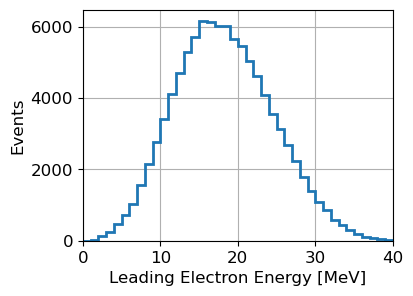

In [39]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")

In [40]:
signal[signal.eMaxE<1]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
24387,2,4387,0.389004,0.389004,0.514736,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.030157,0.030157,300.930019,0.000000,0.000000,227.503947,0.0,0.0,0.0
58914,5,8914,2.552506,0.973905,1.768470,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006413,0.003206,579.020853,0.0,0.0,0.0
72383,7,2383,2.564755,0.979939,1.376962,0.0,0.0,0.0,10.503064,10.503064,1.436464,0.000000,0.000000,0.000000,0.000000,0.000000,467.057711,0.0,0.0,0.0
91598,9,1598,2.150452,0.888356,1.714707,0.0,0.0,0.0,6.562552,6.562552,0.654000,0.000000,0.000000,0.000000,0.003206,0.003206,341.054345,0.0,0.0,0.0


In [41]:
signal.eMaxLength.max()

207.3542228207647

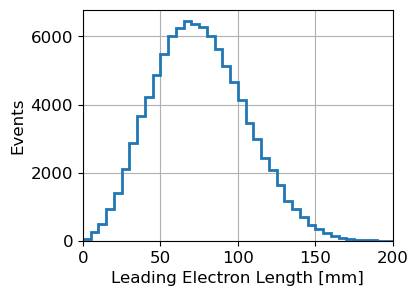

In [42]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxLength, bins = np.linspace(0, 200, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 200])

ax.grid(":")

In [43]:
signal[signal.pMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
15,0,15,33.387790,19.792148,84.246561,0.0,0.0,0.0,5.377986,5.377986,0.471586,0.0,0.0,0.0,0.025977,0.003206,317.638535,0.0,0.0,0.0
21,0,21,31.575575,22.511796,98.393657,0.0,0.0,0.0,7.319425,7.319425,0.794944,0.0,0.0,0.0,0.016280,0.003206,328.609794,0.0,0.0,0.0
23,0,23,17.570195,13.954426,57.754394,0.0,0.0,0.0,2.985427,2.985427,0.177511,0.0,0.0,0.0,0.012825,0.003206,359.885845,0.0,0.0,0.0
24,0,24,27.086427,13.048685,49.467309,0.0,0.0,0.0,7.798727,7.798727,0.900102,0.0,0.0,0.0,0.028862,0.003211,511.049902,0.0,0.0,0.0
35,0,35,21.176878,15.351624,50.408823,0.0,0.0,0.0,3.692284,3.692284,0.246640,0.0,0.0,0.0,0.003533,0.003206,240.939408,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,9,9965,21.755331,15.708391,59.719075,0.0,0.0,0.0,2.713864,2.713864,0.151067,0.0,0.0,0.0,0.007066,0.003206,633.787987,0.0,0.0,0.0
99968,9,9968,26.250462,19.922490,82.864712,0.0,0.0,0.0,10.559758,10.559758,1.480676,0.0,0.0,0.0,0.006442,0.003206,353.775212,0.0,0.0,0.0
99974,9,9974,22.754181,13.599577,57.858697,0.0,0.0,0.0,4.578730,4.578730,0.362437,0.0,0.0,0.0,0.019238,0.003206,427.255105,0.0,0.0,0.0
99981,9,9981,23.842550,21.513749,84.428714,0.0,0.0,0.0,3.455663,3.455663,0.222043,0.0,0.0,0.0,0.006413,0.003206,291.954376,0.0,0.0,0.0


8520 out of 100k (1e5) events have a proton.  0.085%.

## $\nu_e$-Ar Charged-Current Interaction outside the Fiducial Volume

In [44]:
dirtFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/nueArCCoutFiducialEvt.csv'
dirt = pd.read_csv( dirtFile )

In [45]:
dirt

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,31.545229,18.528668,69.776238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,185.906185,0.016358,0.003206,650.035339,0.0,0.0,0.0
1,0,1,2.122853,1.326591,3.000282,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,265.466161,0.0,0.0,0.0
2,0,4,45.138391,37.551757,165.441196,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013478,0.003206,627.438023,0.0,0.0,0.0
3,0,6,0.147012,0.069882,0.021572,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,289.102958,0.0,0.0,0.0
4,0,7,1.610869,1.166113,2.361833,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,274.553145,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231276,39,9992,9.863300,8.164576,42.041635,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013152,0.003206,82.773306,0.0,0.0,0.0
231277,39,9993,0.498337,0.286500,0.225928,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,265.324970,0.0,0.0,0.0
231278,39,9994,1.543603,0.953559,1.433126,0.0,0.0,0.0,0.0,0.0,0.0,0.013546,0.013546,188.514112,0.000327,0.000327,331.065594,0.0,0.0,0.0
231279,39,9996,5.597322,2.529808,5.895294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003533,0.003206,382.081648,0.0,0.0,0.0


In [46]:
dirt.eMaxE.max()

41.70003466802943

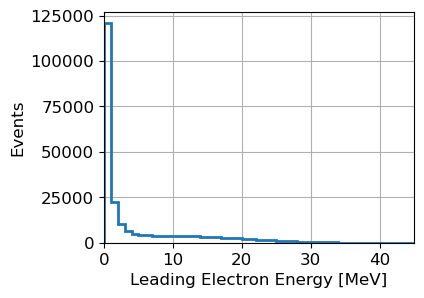

In [47]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(dirt.eMaxE, bins = np.linspace(0, 45, 46), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 45])

ax.grid(":")

In [48]:
dirt.muMaxE.max(), dirt.pMaxE.max(), dirt.nMaxE.max(), dirt.gMaxE.max(), dirt.piMaxE.max()

(0.0, 14.131319092009903, 0.8257643399410881, 0.0033654907014104, 0.0)

## Scale of Each Sample

### Mass of the LAr outside the fiducial volume

V = &pi;r<sup>2</sup>h - 50x40x50, \
where r = 46cm, h = 120cm. \
LAr density = 1.39 g/cm<sup>3</sup> \
Expect 55.9 $\nu_e$-Ar CC interactions in 66.72 kg of LAr

In [49]:
r = 46
h = 120
# unit: cm^2
Vout = np.pi*(46.**2)*120 - 50*40*50
# unit: kg, so divided by 1000
Mout = 1.39*Vout/1000.
Mout

969.8213571733331

In [50]:
nExpOut = 55.9/66.72*Mout
nExpOut

812.545171852358

### Scales of each samples

|        |  Expected number of events per year | Generated number of events | Scale |
|--------|-------------------------------------|----------------------------|-------|
| Cosmics | 1.08e9 | 2.4e6 | 450 |
| $\nu_e$-Ar CC signal | 116.5 | 1e5 | 116.5/1e5 |
| $\nu_e$-Ar CC out fiducial | 813 | 4e5 | 813/4e5 |

In [51]:
fCosmic = 450.
fNueSignal = 116.5/1e5
fNueOutFiducial = 813./4e5
fNueSignal, fNueOutFiducial

(0.001165, 0.0020325)

In [52]:
cosmicNoMuon = cosmic[cosmic.muMaxLength<50.]

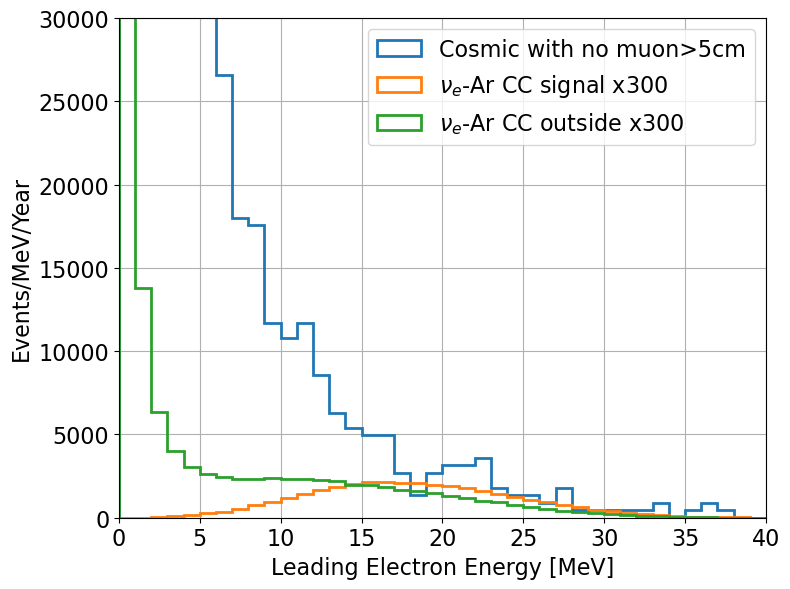

In [53]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eMaxE, weights = np.full_like(cosmicNoMuon.eMaxE, fCosmic), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxE, weights = np.full_like(signal.eMaxE, fNueSignal*300), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eMaxE, weights = np.full_like(dirt.eMaxE, fNueOutFiducial*300), bins = np.linspace(0, 40, 41), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside x300')
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEEx300.pdf')

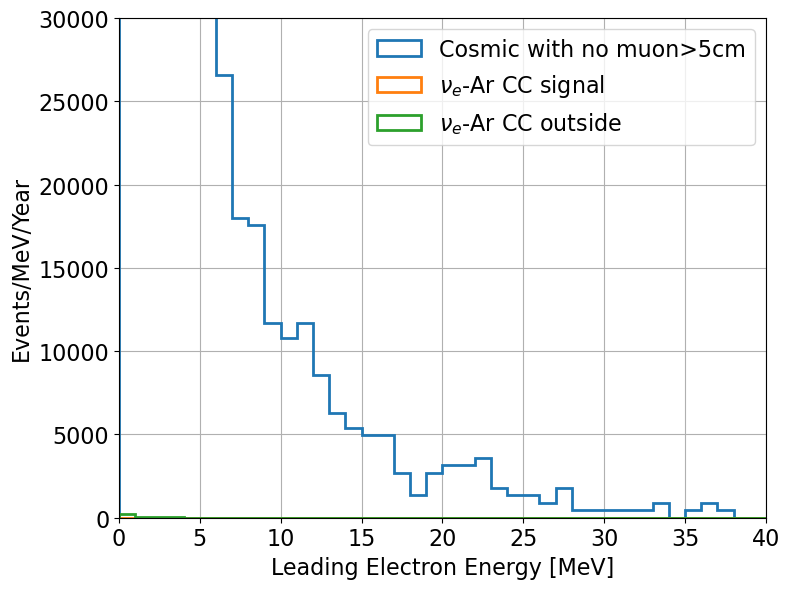

In [54]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eMaxE, weights = np.full_like(cosmicNoMuon.eMaxE, fCosmic), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxE, weights = np.full_like(signal.eMaxE, fNueSignal), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eMaxE, weights = np.full_like(dirt.eMaxE, fNueOutFiducial), bins = np.linspace(0, 40, 41), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside')
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEE.pdf')

In [55]:
120000*fNueOutFiducial

243.9

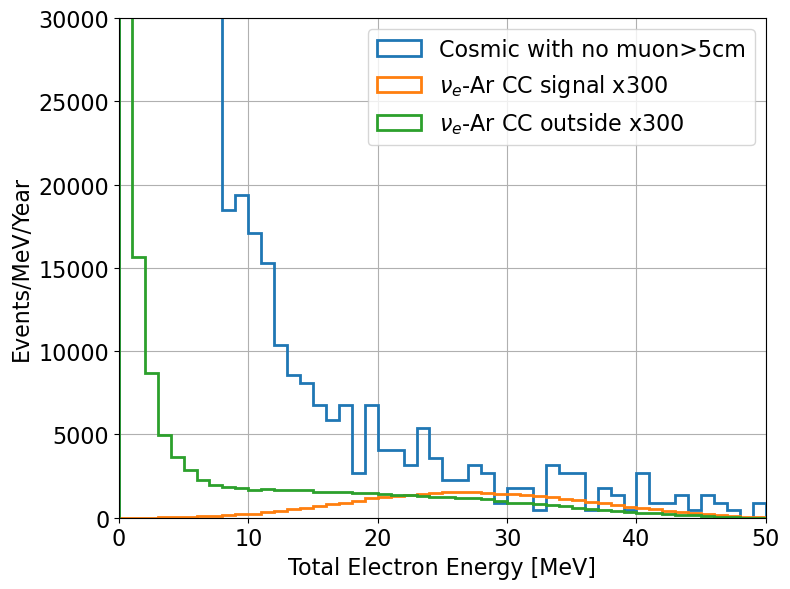

In [56]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eTotalE, weights = np.full_like(cosmicNoMuon.eTotalE, fCosmic), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eTotalE, weights = np.full_like(signal.eTotalE, fNueSignal*300), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eTotalE, weights = np.full_like(dirt.eTotalE, fNueOutFiducial*300), bins = np.linspace(0, 50, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside x300')
ax.set_xlabel( r'Total Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 50])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('TotalEEx300.pdf')

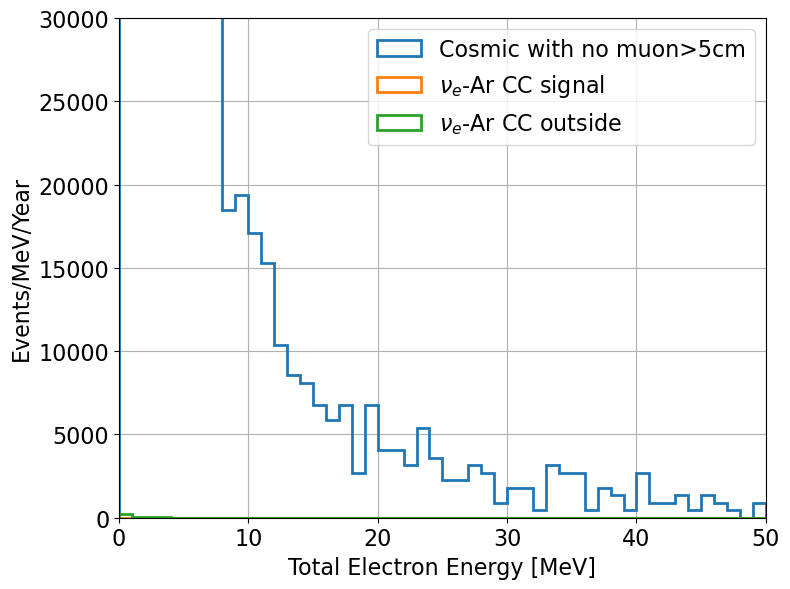

In [57]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eTotalE, weights = np.full_like(cosmicNoMuon.eTotalE, fCosmic), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eTotalE, weights = np.full_like(signal.eTotalE, fNueSignal), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eTotalE, weights = np.full_like(dirt.eTotalE, fNueOutFiducial), bins = np.linspace(0, 50, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside')
ax.set_xlabel( r'Total Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 50])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('TotalEE.pdf')

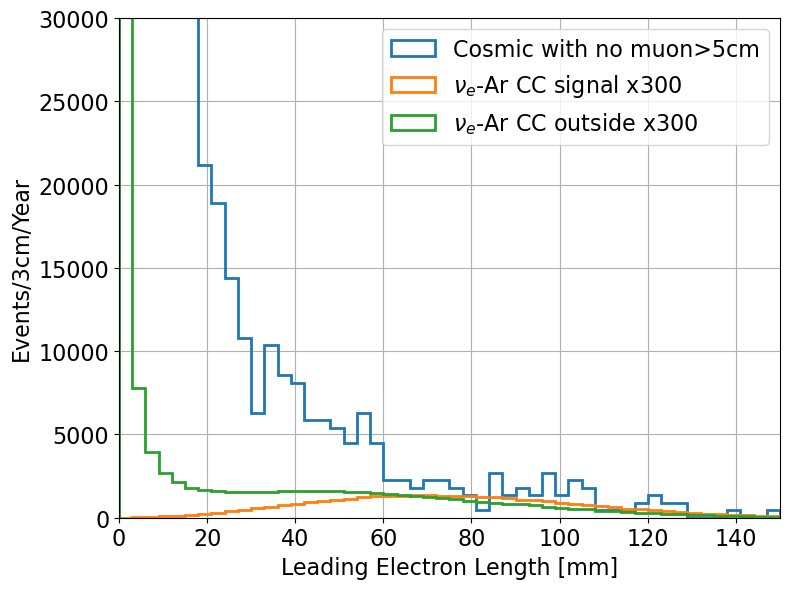

In [58]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eMaxLength, weights = np.full_like(cosmicNoMuon.eMaxLength, fCosmic), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxLength, weights = np.full_like(signal.eMaxLength, fNueSignal*300), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eMaxLength, weights = np.full_like(dirt.eMaxLength, fNueOutFiducial*300), 
        bins = np.linspace(0, 150, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside x300')
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events/3cm/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 150])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingELx300.pdf')

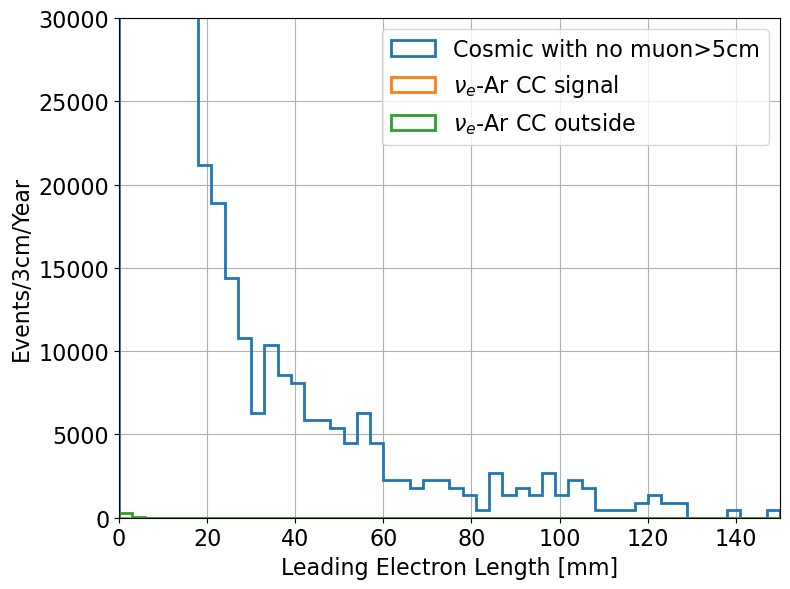

In [59]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist(cosmicNoMuon.eMaxLength, weights = np.full_like(cosmicNoMuon.eMaxLength, fCosmic), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxLength, weights = np.full_like(signal.eMaxLength, fNueSignal), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eMaxLength, weights = np.full_like(dirt.eMaxLength, fNueOutFiducial), 
        bins = np.linspace(0, 150, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC outside')
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events/3cm/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 150])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEL.pdf')